In [339]:
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.ndimage import median_filter

from source.helper import to_dB, print_spectogram, gen_spectogram, diff_frames

In [169]:
BASE_DIR = Path("E:/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR / 'alive_or_dead.h5', 'r')

In [170]:
loaded_file['2023_03_21'].keys()

<KeysViewHDF5 ['chodzonko_1os_4-1-8m_bartek', 'randomowe_chodzonko_1os_bartek', 'wiatrak_2m', 'wiatrak_4m']>

In [382]:
# sample_file = loaded_file['2023_03_21']['wiatrak_2m']
sample_file = loaded_file['2023_03_21']['chodzonko_1os_4-1-8m_bartek']
sample_file = sample_file[:, 0, 0, :]

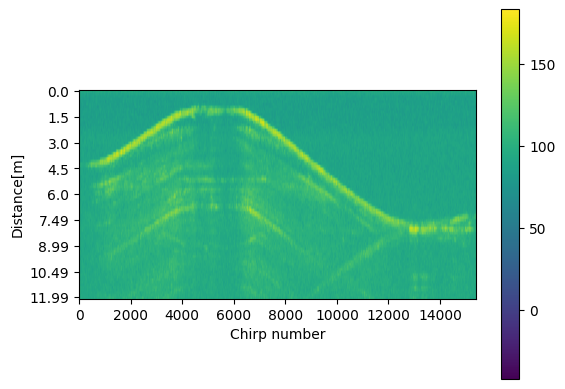

In [383]:
frames_diff = diff_frames(sample_file, 1)  #odejmujemy ostatnią klatkę
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=12)

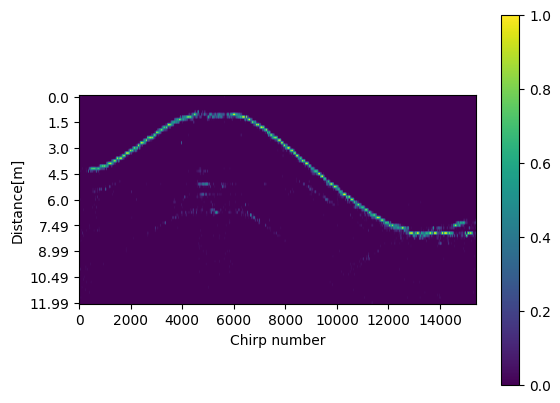

In [384]:
dotted = np.zeros_like(diff_spectdb)
max_indices = np.argmax(diff_spectdb, axis=0)
dotted[max_indices, np.arange(diff_spectdb.shape[1])] = 1
print_spectogram(dotted, y, depth_limit=12)

In [385]:
smoothed_array = median_filter(dotted, size=(2, 6), mode='nearest')

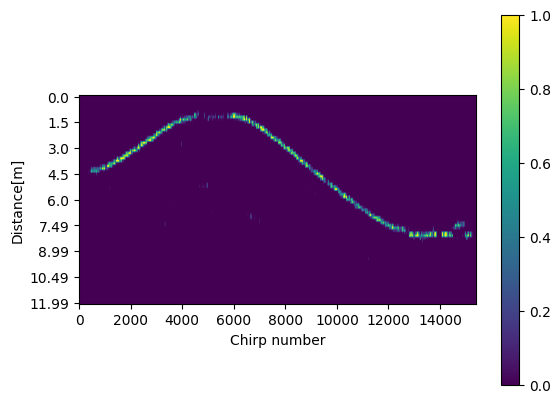

In [386]:
print_spectogram(smoothed_array, y, depth_limit=12)

In [387]:
box_cropped = np.copy(dotted)
box_list = []
centers_list = []
number_of_boxes = 1000
max_indices_smoothed = np.argmax(smoothed_array, axis=0)

for img_column_idx in range(100, box_cropped.shape[1] - 100, int(box_cropped.shape[1] / number_of_boxes)):
    box_list.append(max_indices_smoothed[img_column_idx - 90: img_column_idx + 90])

In [388]:
max_indices.shape

(15394,)

In [399]:
box_means = [box.mean() for box in box_list]
box_vars = [box.var() for box in box_list]
box_skew = [np.nan_to_num(scipy.stats.skew(box)) for box in box_list]
box_kurt = [np.nan_to_num(scipy.stats.kurtosis(box)) for box in box_list]

# box_means = median_filter(box_means, size=10)
# box_vars = median_filter(box_vars, size=10)
# box_skew = median_filter(box_skew, size=10)
# box_kurt = median_filter(box_kurt, size=10)

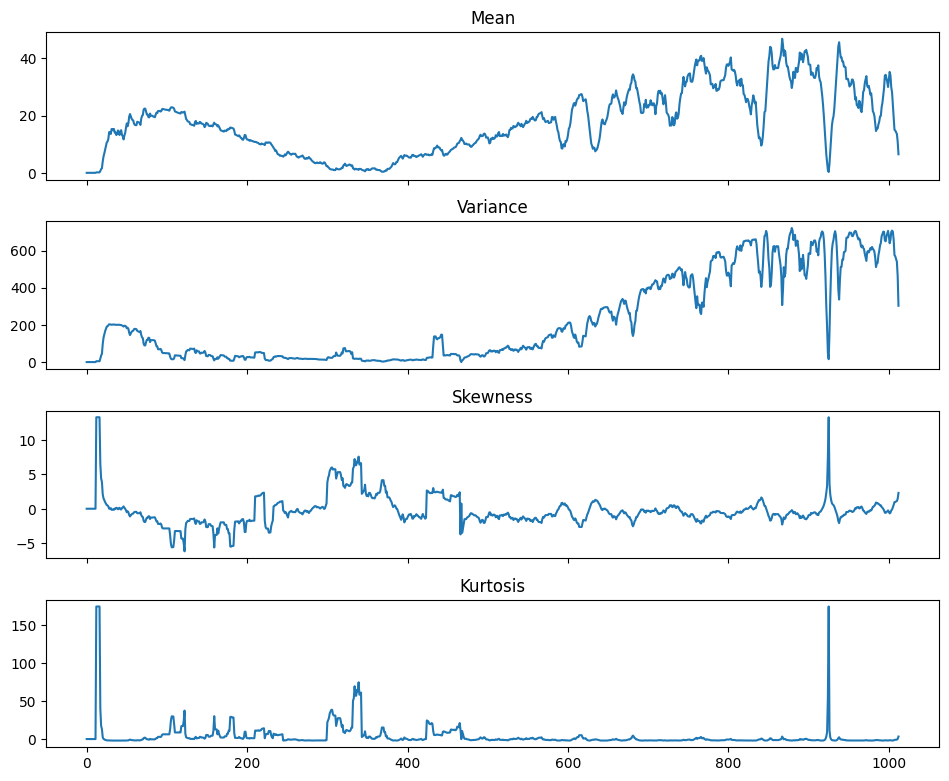

In [400]:
fig, axs = plt.subplots(4, figsize=(10,8), sharex='all')
fig.tight_layout(pad=2)

axs[0].plot(box_means)
axs[0].set_title('Mean')
axs[1].plot(box_vars)
axs[1].set_title('Variance')
axs[2].plot(box_skew)
axs[2].set_title('Skewness')
axs[3].plot(box_kurt)
axs[3].set_title('Kurtosis')

plt.show()

In [336]:
# plt.plot(box_means)
# plt.yticks(np.arange(start=0, stop=81, step=10), y[:81:10])
# plt.show()